# NLP - yelp review 

data source: kaggle

**Some Libraries**

In [11]:
import nltk
import pandas as pd
import numpy as np

**Getting the data**

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Note: the original file is in xxx.json with some more features, converted to xxx.csv with less features.

In [12]:
df = pd.read_csv('../yelp-dataset/yelp_academic_dataset_review.json.csv')

In [13]:
df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,The pizza was okay. Not the best I've had. I p...,0,0,0
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,I love this place! My fiance And I go here atl...,0,0,0
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,Terrible. Dry corn bread. Rib tips were all fa...,3,1,1
3,Er4NBWCmCD4nM8_p1GRdow,msQe1u7Z_XuqjGoqhB0J5g,elqbBhBfElMNSrjFqW3now,2,2011-02-25,Back in 2005-2007 this place was my FAVORITE t...,2,0,0
4,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [15]:
#we limit our dataset to first 50000
df1 = df[0:50000]

In [16]:
df1.describe()

,stars,useful,funny,cool
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.659920,1.039740,0.274280,0.257560
std,1.553536,3.297074,1.869128,0.890055
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,536.000000,328.000000,90.000000


**Text Cleaning**

In [17]:
#import cleaning library
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup 
from textblob import TextBlob

In [18]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    ps = PorterStemmer() 
    #stemming will take the root of the word
    #there are many stemmer available
    # 5. Remove stop words
    meaningful_words = [ps.stem(w) for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [19]:
df1['text_processed'] = df1['text'].apply(review_to_words)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Create a new column called "text length" which is the number of words in the text column.**

In [20]:
df1['text length'] = df1['text_processed'].apply(len)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
review_id         50000 non-null object
user_id           50000 non-null object
business_id       50000 non-null object
stars             50000 non-null int64
date              50000 non-null object
text              50000 non-null object
useful            50000 non-null int64
funny             50000 non-null int64
cool              50000 non-null int64
text_processed    50000 non-null object
text length       50000 non-null int64
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

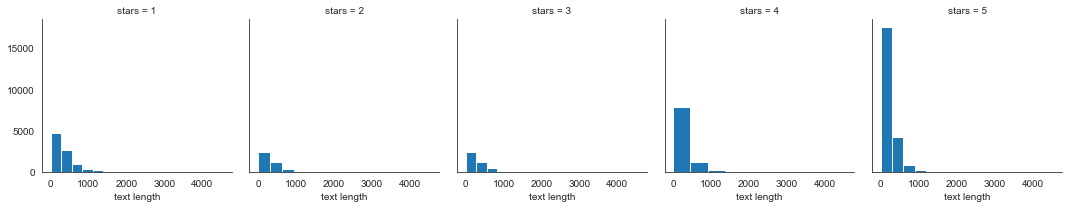

In [24]:
g = sns.FacetGrid(df1,col='stars')
g.map(plt.hist,'text length')

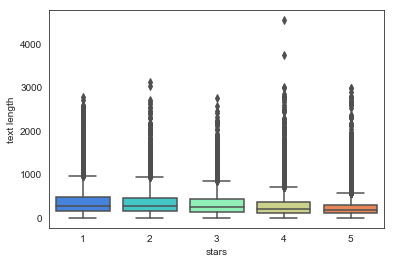

In [25]:
sns.boxplot(x='stars',y='text length',data=df1,palette='rainbow')

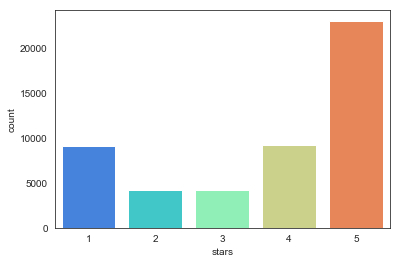

In [28]:
sns.countplot(x='stars',data=df1,palette='rainbow')

In [27]:
df1['stars'].value_counts().head()

5    23098
4     9286
1     9141
3     4271
2     4204
Name: stars, dtype: int64

**Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [29]:
stars = df1.groupby('stars').mean()
stars

,useful,funny,cool,text length
stars,,,,
1,2.048463,0.570397,0.184006,379.890931
2,1.232398,0.393673,0.211703,368.751189
3,0.764692,0.247483,0.208148,334.058768
4,0.725393,0.188563,0.297868,287.806483
5,0.782708,0.174777,0.287947,238.606070


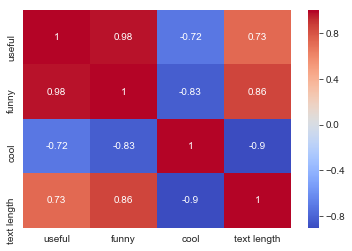

In [31]:
sns.heatmap(stars.corr(),annot=True,cmap='coolwarm')

# NLP Classification Task

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [33]:
yelp_class = df1[(df1.stars==1) | (df1.stars==5)]

# Vectorization (Bag of Words)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [46]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = cv.fit_transform(yelp_class['text_processed'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train_data_features, yelp_class['stars'],test_size=0.3,random_state=101)

# (1) Naive Bayes

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [64]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
predictions = nb.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [67]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test, predictions))

[[2529  281]
 [ 348 6514]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      2810
           5       0.96      0.95      0.95      6862

   micro avg       0.93      0.93      0.93      9672
   macro avg       0.92      0.92      0.92      9672
weighted avg       0.94      0.93      0.94      9672



0.9349669148056244


# How if we use `"TfidfTransformer"`?

In [68]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [71]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [72]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [73]:
predictions = pipeline.predict(X_test)

In [74]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test, predictions))

[[1466 1344]
 [  14 6848]]


              precision    recall  f1-score   support

           1       0.99      0.52      0.68      2810
           5       0.84      1.00      0.91      6862

   micro avg       0.86      0.86      0.86      9672
   macro avg       0.91      0.76      0.80      9672
weighted avg       0.88      0.86      0.84      9672



0.8595947063688999


Seems TF-IDF makes the thing worse.

# (2) Lets try Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_data_features, yelp_class['stars'],test_size=0.3,random_state=101)

In [77]:
lg_model.fit(X_train, y_train)
Y_pred = lg_model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
print(confusion_matrix(y_test, Y_pred))
print('\n Accuracy:')
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[2582  228]
 [ 162 6700]]

 Accuracy:
0.9596774193548387
              precision    recall  f1-score   support

           1       0.94      0.92      0.93      2810
           5       0.97      0.98      0.97      6862

   micro avg       0.96      0.96      0.96      9672
   macro avg       0.95      0.95      0.95      9672
weighted avg       0.96      0.96      0.96      9672



Logistic Regression performs better than naive bayes! We could try more algorithm. But the goal of this exercise is to familiarize with NLP. So thats it!